# Global Tempeature Data

The earth is warming by a lot, but physically it may feel different for someone living in Stockholm than it is for another in Tokyo. This notebook aims to visually understand this better and further inform our project.

In [2]:
# import the dask libraries
import dask
import dask.dataframe as dd
from dask.distributed import LocalCluster, Client

#import graphing libraries
import seaborn as sns

In [3]:
#Using dask to read in the data
major_cities = dd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

In [4]:
# Examine the head of the data
major_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
# Create a Dask Client
cluster = LocalCluster()
client = Client(cluster)

/home/vscode/.venv/lib/python3.10/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46001 instead
  warnings.warn(


In [6]:
# Check for data for Abidjan in the data
major_cities[(major_cities['Country'] == 'Côte D\'Ivoire') & (major_cities['City']  == 'Abidjan')].head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [7]:
major_cities['dt'] = dd.to_datetime(major_cities['dt'])
major_cities = major_cities.rename(columns={'dt': 'date'})
major_cities['year'] = major_cities['date'].dt.year
major_cities.head()

,date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849


In [8]:
#List out unique cities and countries in the data
unique_cities = major_cities[['City','Country']].drop_duplicates()
unique_cities.reset_index().drop('index', axis=1).compute()

,City,Country
0,Abidjan,Côte D'Ivoire
1,Addis Abeba,Ethiopia
2,Ahmadabad,India
3,Aleppo,Syria
4,Alexandria,Egypt
...,...,...
95,Tokyo,Japan
96,Toronto,Canada
97,Umm Durman,Sudan
98,Wuhan,China


In [18]:
# define a new dataframe with NYC data
nyc = major_cities[(major_cities['Country'] == 'United States') & (major_cities['City']  == 'New York')]

<AxesSubplot:xlabel='year', ylabel='AverageTemperature'>

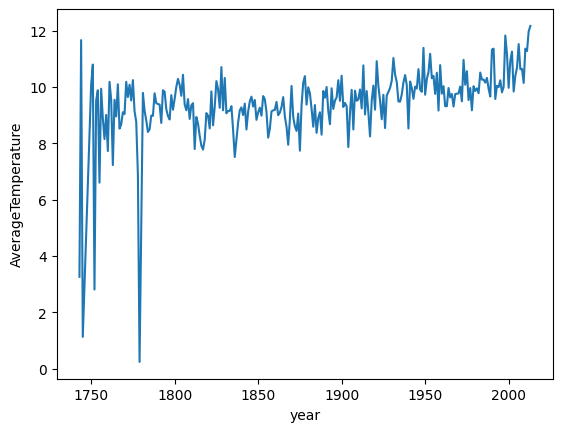

In [25]:
# group by year and calculate the mean temperature of each year in New York
nyc_mean = nyc.groupby('year').mean().reset_index()

# plot the data
sns.lineplot(x='year', y='AverageTemperature', data=nyc_mean.compute())

<AxesSubplot:xlabel='year', ylabel='AverageTemperature'>

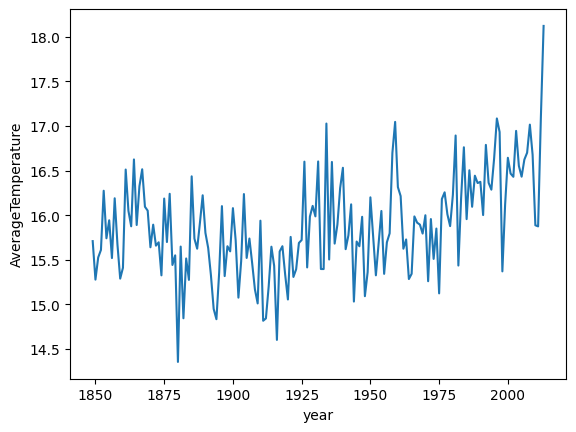

In [24]:
# subset data for los angeles
la = major_cities[(major_cities['Country'] == 'United States') & (major_cities['City']  == 'Los Angeles')]

#group by year and calculate the mean average temperature of each year in Los Angeles
la_mean = la.groupby('year').mean().reset_index()

# plot the data
sns.lineplot(x='year', y='AverageTemperature', data=la_mean.compute())

In [23]:
# close the client
client.close()